In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the Mahalanobis distance
def mahalanobis_dist(x1, x2, cov_matrix):
    mean_diff = x1 - x2  
    cov_matrix_inv = np.linalg.inv(cov_matrix)  
    distance = np.sqrt(np.dot(np.dot(mean_diff.T, cov_matrix_inv), mean_diff))
    return distance

# Define the KMeans clustering function
def KMeansClustering(X, K, maxIteration, mod: bool, tolerance=1e-4):
    m = X.shape[0]
    np.random.seed(42)
    centroids = X[np.random.choice(m, K, replace=False)]
    idx = np.zeros(m, dtype=int)
    prevCentroid = np.zeros_like(centroids)
    cov = np.cov(X, rowvar=False)
    print("Covariance Matrix:")
    print(cov)
    print("\nMean of the data:")
    print(np.mean(X, axis=0))
    iteration_list = []
    centroid_movements = []

    for i in range(maxIteration):
        if mod:
            dist = np.zeros((m, K))
            for j in range(m):
                for k in range(K):
                    dist[j, k] = mahalanobis_dist(X[j], centroids[k], cov)
        else: 
            dist = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        idx = np.argmin(dist, axis=1)
        prevCentroid = centroids.copy()
        for k in range(K):
            points = X[idx == k]
            if len(points) > 0:
                centroids[k] = np.mean(points, axis=0)
        centroid_movement = np.linalg.norm(centroids - prevCentroid)
        iteration_list.append(i + 1)
        centroid_movements.append(centroid_movement)
        if centroid_movement < tolerance:
            print(f"Converged in {i + 1} iterations!")
            break

    # Plot the centroid movement
    plt.figure(figsize=(8, 5))
    plt.plot(iteration_list, centroid_movements, marker='o', label="Centroid Movement")
    plt.title("Centroid Movement vs. Iterations")
    plt.xlabel("Iteration")
    plt.ylabel("Centroid Movement")
    plt.grid(True)
    plt.legend()
    plt.show()
        
    return centroids, idx

Dataset shape: (1800, 3)
          0         1   2
0 -0.190176 -0.195489 NaN
1 -0.208340  0.107337 NaN
2 -0.487379  0.131786 NaN
3 -0.564656 -0.193942 NaN
4  0.527243 -0.166957 NaN


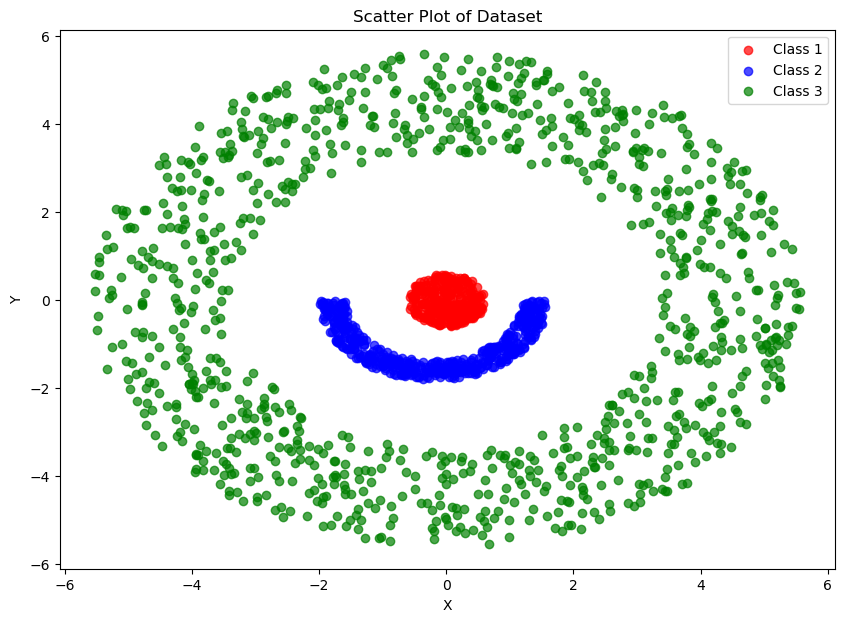

In [5]:
# Load the dataset
data = pd.read_csv(r'C:\Users\nitip\OneDrive\Desktop\dec2024\Group04[1]\Group04\NLS_Group04.txt', delimiter=' ', header=None)

# Check the shape of the dataset and inspect
print(f"Dataset shape: {data.shape}")
print(data.head())  # Inspect the first few rows

# Dynamically create column names based on the number of columns
num_columns = data.shape[1]
column_names = ['X', 'Y'] + [f'Feature_{i}' for i in range(3, num_columns + 1)]
data.columns = column_names

# Assign class labels
# First 300 rows -> Class 1, next 500 rows -> Class 2, last 1000 rows -> Class 3
class_labels = np.concatenate([np.zeros(300), np.ones(500), np.full(1000, 2)])
data['Class'] = class_labels

# Scatter plot for classes
plt.figure(figsize=(10, 7))
plt.scatter(data[data['Class'] == 0]['X'], data[data['Class'] == 0]['Y'], color='red', label='Class 1', alpha=0.7)
plt.scatter(data[data['Class'] == 1]['X'], data[data['Class'] == 1]['Y'], color='blue', label='Class 2', alpha=0.7)
plt.scatter(data[data['Class'] == 2]['X'], data[data['Class'] == 2]['Y'], color='green', label='Class 3', alpha=0.7)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Dataset')
plt.legend()
plt.show()

Covariance Matrix:
[[6.06943505 0.14164447]
 [0.14164447 6.49613008]]

Mean of the data:
[ 0.00842679 -0.30889815]
Converged in 21 iterations!


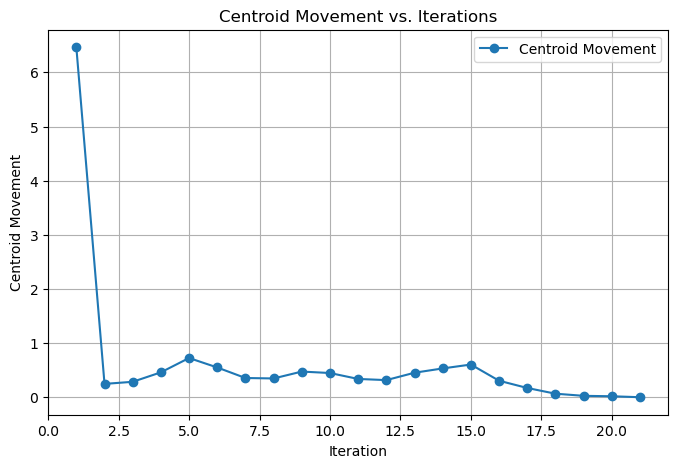

Covariance Matrix:
[[6.06943505 0.14164447]
 [0.14164447 6.49613008]]

Mean of the data:
[ 0.00842679 -0.30889815]
Converged in 30 iterations!


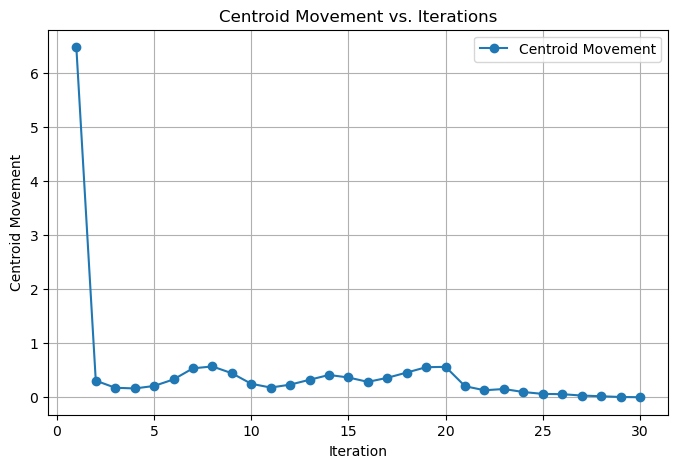

In [6]:

# Prepare data for clustering
X = data[['X', 'Y']].values  # Use only 'X' and 'Y' for clustering

# Perform clustering with Euclidean distance
centroidEuclid, idxEuclid = KMeansClustering(X, 3, 100, mod=False)

# Perform clustering with Mahalanobis distance
centroidMahalanobis, idxMahalanobis = KMeansClustering(X, 3, 100, mod=True)


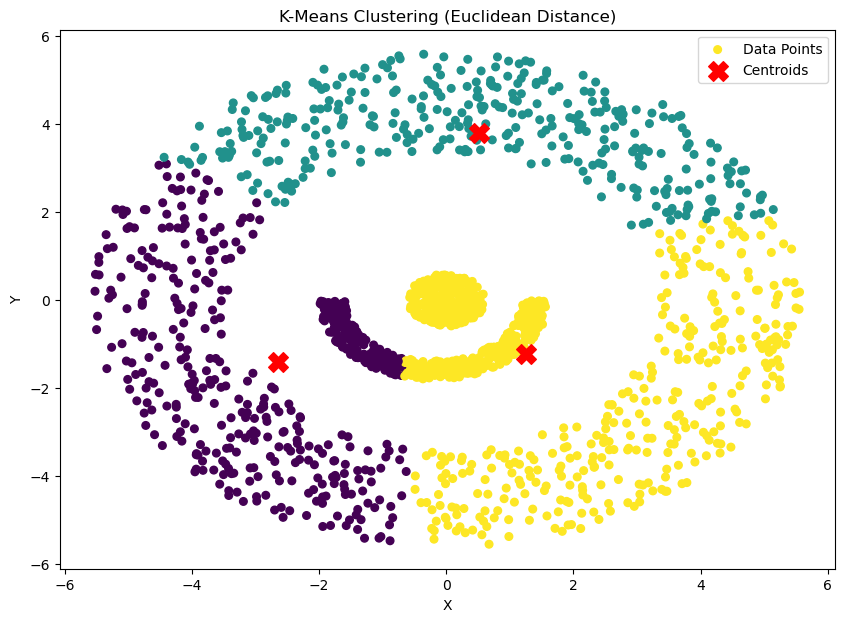

In [7]:
# Plot Euclidean results
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=idxEuclid, cmap='viridis', s=30, label='Data Points')
plt.scatter(centroidEuclid[:, 0], centroidEuclid[:, 1], color='red', marker='X', s=200, label='Centroids')
plt.title("K-Means Clustering (Euclidean Distance)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

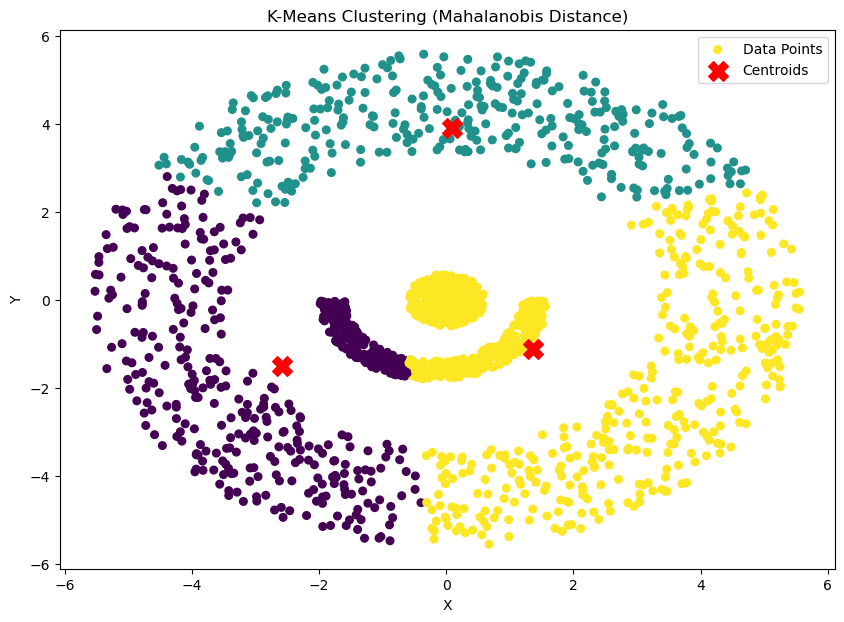

In [8]:
# Plot Mahalanobis results
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=idxMahalanobis, cmap='viridis', s=30, label='Data Points')
plt.scatter(centroidMahalanobis[:, 0], centroidMahalanobis[:, 1], color='red', marker='X', s=200, label='Centroids')
plt.title("K-Means Clustering (Mahalanobis Distance)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()